In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# define exact function,for test
def exact_function(x,y):
    u_xy = np.sin(np.pi * x)**2 * np.sin(np.pi * y)**2
    return u_xy

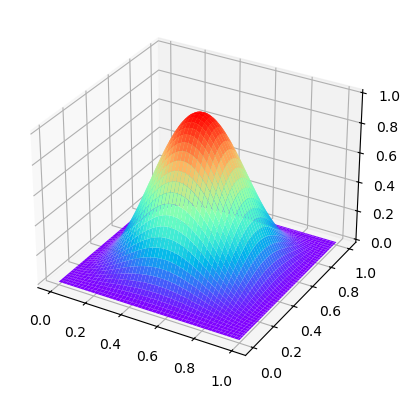

In [3]:
# test real function
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
xx,yy = np.meshgrid(x,y)
u_xy = exact_function(xx,yy)
ax3 = plt.axes(projection='3d')
ax3.plot_surface(xx,yy,u_xy,cmap='rainbow') 

In [4]:
# calculate f(x,y),the source term
def soure_term(x,y):
    f_xy = 2*np.pi**2 * (np.cos(2*np.pi*x) * np.sin(np.pi*y)**2 + np.cos(2*np.pi*y) * np.sin(np.pi*x)**2)
    return f_xy

In [5]:
def get_source_term(N1,N2):
    x = np.linspace(0,1,N1,endpoint = False)
    y = np.linspace(0,1,N2,endpoint = False)
    x = x[1:]
    y = y[1:]
    xx,yy = np.meshgrid(x,y)
    xx,yy = np.meshgrid(x,y,indexing='ij')
    sourse_term = soure_term(xx,yy)
    sourse_term = sourse_term.flatten(order='F')
    return sourse_term

In [6]:
def jacobi_method(A, b, tol=(1e-6, 1e-6), max_its=100, x0=None):
    n = len(A)
    if x0 is None:
        x0 = np.zeros(n)
    
    tol_rel, tol_abs = tol
    norm_b = np.linalg.norm(b)
    x = x0
    r = b - np.dot(A, x)
    norm_r = np.linalg.norm(r)
    its = 0
    
    # Track residuals
    residuals = [norm_r]

    D = np.diag(np.diag(A))
    G = np.eye(n) - np.linalg.solve(D, A)

    while norm_r > tol_rel * norm_b + tol_abs and its < max_its:
        its += 1
        x = np.dot(G, x) + np.linalg.solve(D, b)
        r = b - np.dot(A, x)
        norm_r = np.linalg.norm(r)
        residuals.append(norm_r)
    
    return x, residuals

In [7]:
# five_point method
def five_point(N1,N2,sourse_term,boundary_condition):
    # calculate stepsize
    h1 = 1/N1
    h2 = 1/N2
    print(h1)
    # calculate C ,D,then A
    C = np.zeros([N1-1,N1-1])
    cxx = 2 * (1/h1**2 + 1/h2**2)
    cxxm = - 1/h1**2
    C = np.eye(N1-1)*cxx + np.eye(N1-1,k=-1)*cxxm + np.eye(N1-1,k=1)*cxxm
    N = (N1 - 1) * (N2 - 1)
    I = np.eye(N2-1)
    CC =  np.kron(I, C)
    #print(CC)
    dxx = - 1/h2**2
    DD = np.eye(N,k=N1-1)*dxx + np.eye(N,k=1-N1)*dxx
    #print(DD)
    A =-(CC + DD)
    #print(A)
    b = sourse_term + boundary_condition
    u_vector = np.linalg.solve(A, b)# here should be changed
    #print(u_vector)
    # reshape u
    u_metrix = u_vector.reshape(N1-1,N2-1,order='F')
    return u_metrix

0.01
(99, 99)
(99, 99)


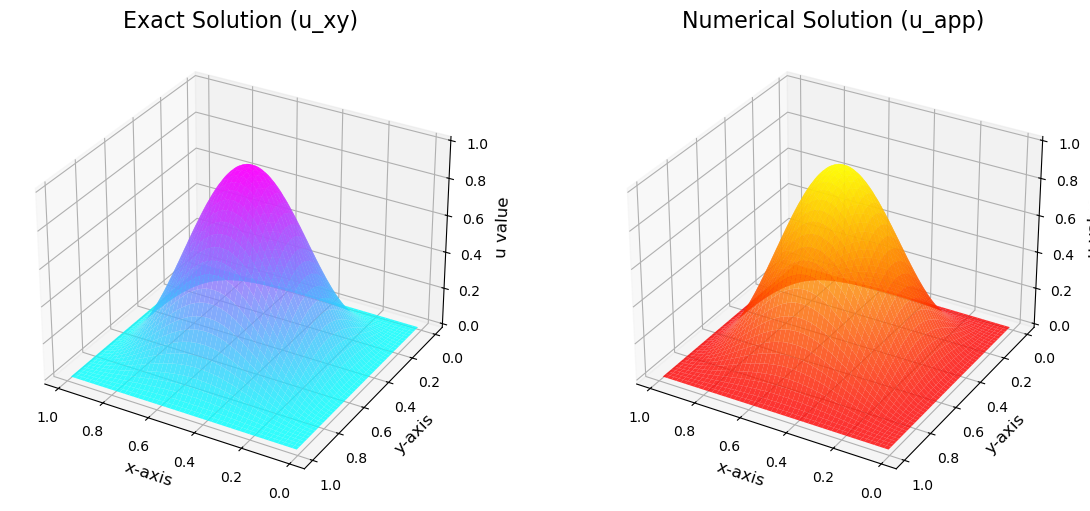

In [8]:
# test forward Euler method
N = 100
N1 = N
N2 = N
boundary_condition = np.zeros((N1-1)*(N2-1))
sourse_term = np.zeros((N1-1)*(N2-1))
h1 = 1/N2
h2 = 1/N1
# for j in range(N2-1):
#     for i in range(N1-1):
#         sourse_term[i+j*(N1-1)] = soure_term((i+1)*h1,(j+1)*h2)
#print(sourse_term)
x = np.linspace(0,1,N1,endpoint = False)
y = np.linspace(0,1,N2,endpoint = False)
x = x[1:]
y = y[1:]
xx,yy = np.meshgrid(x,y,indexing='ij')
u_xy = exact_function(xx,yy)
sourse_term = soure_term(xx,yy)
sourse_term = sourse_term.flatten(order='F')
u_app = five_point(N1,N2,sourse_term,boundary_condition)
fig = plt.figure(figsize=(14, 6))  # Set figure size
# Subplot 1: Exact solution
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(xx,yy, u_xy, cmap='cool', alpha=0.8)
ax1.set_title('Exact Solution (u_xy)', fontsize=16)
ax1.set_xlabel('x-axis', fontsize=12)
ax1.set_ylabel('y-axis', fontsize=12)
ax1.set_zlabel('u value', fontsize=12)
ax1.view_init(elev=30, azim=120)

print(xx.shape)
print(yy.shape)
# Subplot 2: Numerical solution
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
#u_app = u_app.T
surf2 = ax2.plot_surface(xx, yy, u_app, cmap='autumn', alpha=0.8)
ax2.set_title('Numerical Solution (u_app)', fontsize=16)
ax2.set_xlabel('x-axis', fontsize=12)
ax2.set_ylabel('y-axis', fontsize=12)
ax2.set_zlabel('u value', fontsize=12)
ax2.view_init(elev=30, azim=120)

#plt.tight_layout()
plt.show()


In [9]:
def calculate_error_norm1_norminfinte(u_ext,u_num):# function that calculate the error between real and numerical solutions in 
    error1 = np.abs(u_ext - u_num)
    error2 = np.max(error1)
    return error1, error2

0.125
0.0625
0.03125
0.015625
0.0078125


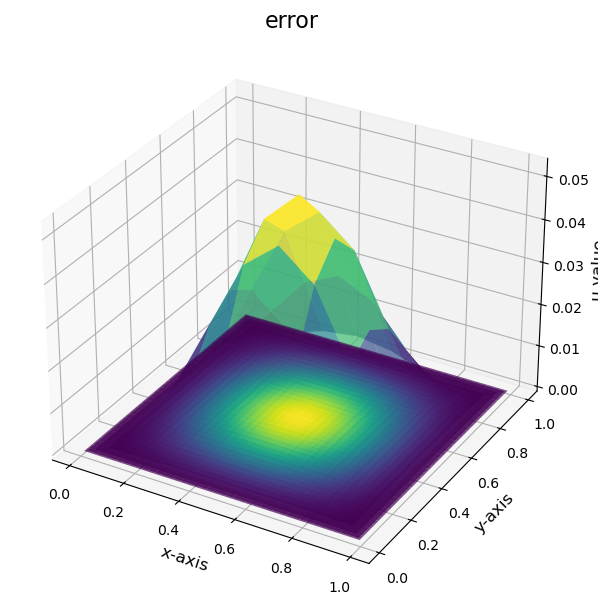

[0.24421875762074907, 0.2485543505103116, 0.2496385698963723, 0.24990964141428398]


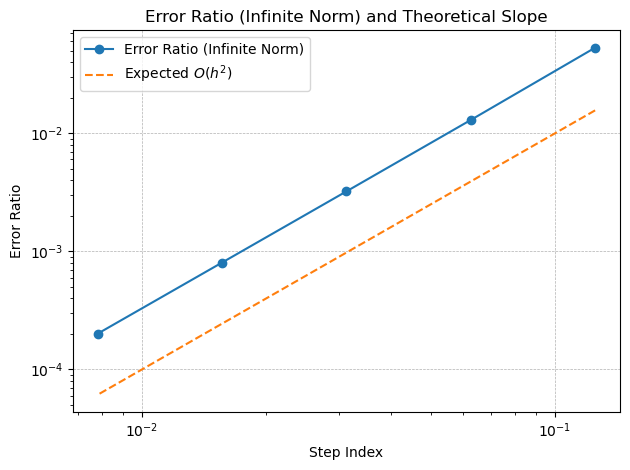

In [10]:
N_list = [8,16,32,64,128]
h_list = [1.0 / n for n in N_list]
error1_list = []
error2_list = []
error2_ratio = []

fig = plt.figure(figsize=(12, 6))
ax4 = fig.add_subplot(1, 2, 1, projection='3d')

for N in N_list:
    x = np.linspace(0,1,N,endpoint = False)
    y = np.linspace(0,1,N,endpoint = False)
    x = x[1:]
    y = y[1:]
    xx,yy = np.meshgrid(x,y,indexing='ij')
    boundary_condition = np.zeros((N-1)*(N-1))
    sourse_term = soure_term(xx,yy)
    sourse_term = sourse_term.flatten(order='F')
    u_ext = exact_function(yy,xx)
    u_num = five_point(N,N,sourse_term,boundary_condition)
    error1,error2 = calculate_error_norm1_norminfinte(u_ext,u_num)
    #print(error1)
    error1_list.append(error1)
    error2_list.append(error2)
    ax4.plot_surface(xx, yy, error1, cmap='viridis', edgecolor='none', alpha=0.7, label=f'N={N}')
ax4.set_title('error', fontsize=16)
ax4.set_xlabel('x-axis', fontsize=12)
ax4.set_ylabel('y-axis', fontsize=12)
ax4.set_zlabel('u value', fontsize=12)
plt.tight_layout()
plt.show()


# calculate E2/E1
for i in range(1, len(error2_list)):
    error2_ratio.append(error2_list[i] / error2_list[i-1])

print(error2_ratio)

# theoretical_slope
h_ratio = [h_list[i] / h_list[i-1] for i in range(1, len(h_list))]


# error
plt.figure()
plt.loglog(h_list , error2_list, 'o-', label="Error Ratio (Infinite Norm)")
plt.loglog(h_list, [h**2 for h in h_list], linestyle='--', label='Expected $O(h^2)$')
plt.xlabel("Step Index")
plt.ylabel("Error Ratio")
plt.title("Error Ratio (Infinite Norm) and Theoretical Slope")
plt.grid(True,  linestyle="--", linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()
    

In [14]:
# richardson_extrapolation method
def richardson_extrapolation(N1,N2):
    
    N11 = 2 * N1 
    N22 = 2 * N2 
    sourse_term1 = get_source_term(N1,N2)
    sourse_term2 = get_source_term(N11,N22)
    boundary_condition1 = np.zeros((N1-1)*(N2-1))
    boundary_condition2 = np.zeros((N11-1)*(N22-1))
    u_1 = five_point(N1,N2,sourse_term1,boundary_condition1)
    u_2 = five_point(N11,N22,sourse_term2,boundary_condition2)
    u_2 = u_2[1::2, 1::2]
    u = 4/3 * u_2 - 1/3 * u_1

    return u

0.125
0.0625
0.0625
0.03125
0.03125
0.015625
0.015625
0.0078125


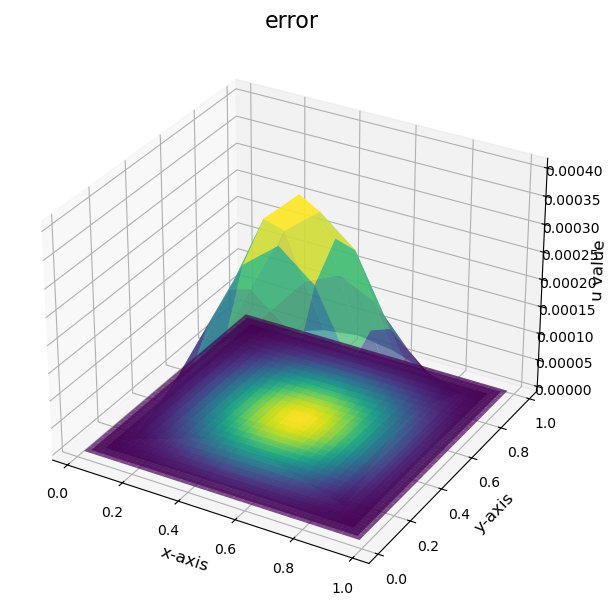

[0.061069005443539714, 0.062141636204859164, 0.0624103745000852]


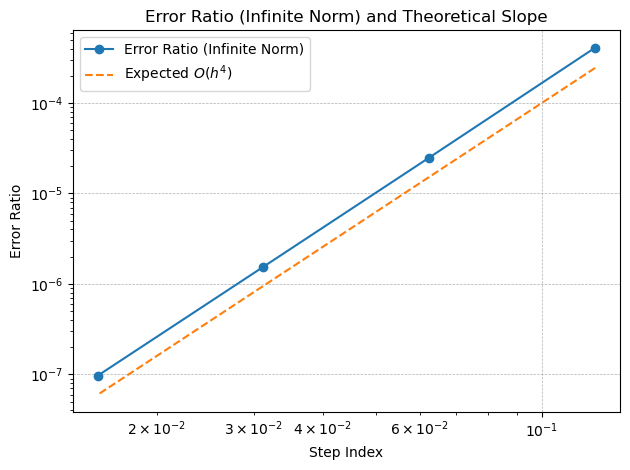

In [24]:
N_list = [8,16,32,64]
h_list = [1.0 / n for n in N_list]
error1_list_R = []
error2_list_R = []
error2_ratio_R = []

fig = plt.figure(figsize=(12, 6))
ax5 = fig.add_subplot(1, 2, 1, projection='3d')

for N in N_list:
    x = np.linspace(0,1,N,endpoint = False)
    y = np.linspace(0,1,N,endpoint = False)
    x = x[1:]
    y = y[1:]
    xx,yy = np.meshgrid(x,y,indexing='ij')
    u_ext = exact_function(yy,xx)
    u_num = richardson_extrapolation(N,N)
    error1,error2 = calculate_error_norm1_norminfinte(u_ext,u_num)
    #print(error1)
    error1_list_R.append(error1)
    error2_list_R.append(error2)
    ax5.plot_surface(xx, yy, error1, cmap='viridis', edgecolor='none', alpha=0.7, label=f'N={N}')
ax5.set_title('error', fontsize=16)
ax5.set_xlabel('x-axis', fontsize=12)
ax5.set_ylabel('y-axis', fontsize=12)
ax5.set_zlabel('u value', fontsize=12)
plt.tight_layout()
plt.show()


# calculate E2/E1
for i in range(1, len(error2_list_R)):
    error2_ratio_R.append(error2_list_R[i] / error2_list_R[i-1])

print(error2_ratio_R)

# error
plt.figure()
plt.loglog(h_list , error2_list_R, 'o-', label="Error Ratio (Infinite Norm)")
plt.loglog(h_list, [h**4 for h in h_list], linestyle='--', label='Expected $O(h^4)$')
plt.xlabel("Step Index")
plt.ylabel("Error Ratio")
plt.title("Error Ratio (Infinite Norm) and Theoretical Slope")
plt.grid(True,  linestyle="--", linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# compact finite differention method
def compact_finite(N1,N2,sourse_term,boundary_condition):
    # calculate stepsize
    h1 = 1/N1
    h2 = 1/N2
    print(h1)
    # calculate C ,D,then A
    C = np.zeros([N1-1,N1-1])
    cxx = 5/3 * (1/h1**2 + 1/h2**2)
    cxxm = -1/6 *(5 * 1/h1**2 - 1/h2**2)
    C = np.eye(N1-1)*cxx + np.eye(N1-1,k=-1)*cxxm + np.eye(N1-1,k=1)*cxxm
    N = (N1 - 1) * (N2 - 1)
    I = np.eye(N2-1)
    CC =  np.kron(I, C)
    #print(CC)
    dxx = - 1/6 * (5 * 1/h2**2 - 1/h1**2)
    dxxm = -1/12 * (1/h1**2 + 1/h2**2)
    I2 = np.eye(N2-1,k=N1-1)
    I22 = np.eye(N2-1,k=1-N1)
    D = np.eye(N1-1)*dxx + np.eye(N1-1,k=-1)*dxxm + np.eye(N1-1,k=1)*dxxm
    DD =  np.kron(I2, D) + np.kron(I22, D)
    #print(DD)
    A =-(CC + DD)
    #print(A)
    b = sourse_term + boundary_condition
    u_vector = np.linalg.solve(A, b)# here should be changed
    #print(u_vector)
    # reshape u
    u_metrix = u_vector.reshape(N1-1,N2-1,order='F')
    return u_metrix

0.125
0.0625
0.03125
0.015625


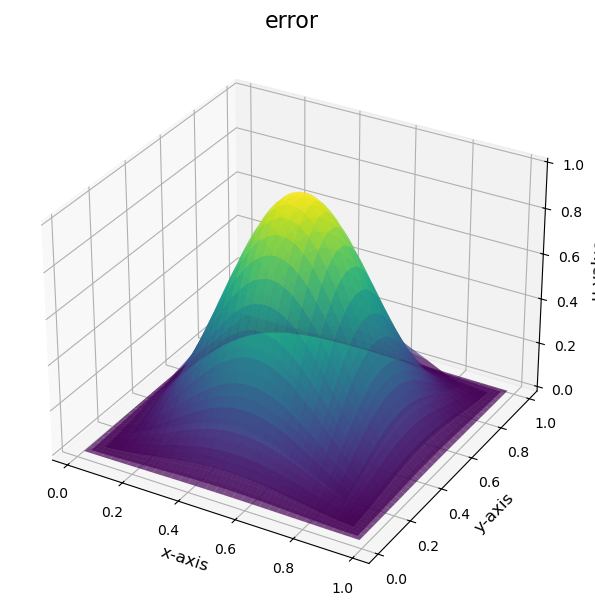

[1.2699387792706716, 1.0596528970466745, 1.0145642244916868]


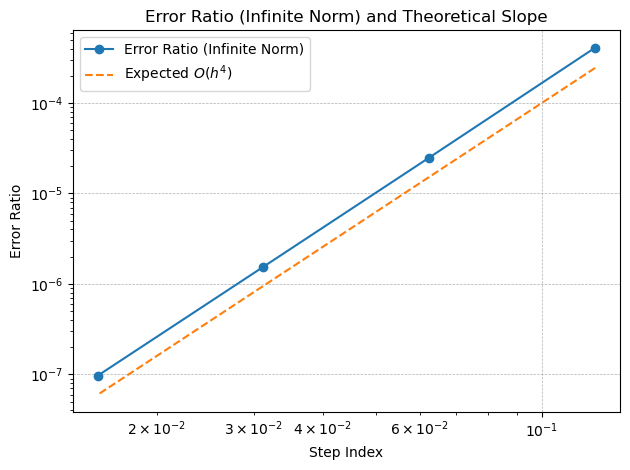

In [40]:
N_list = [8,16,32,64]
h_list = [1.0 / n for n in N_list]
error1_list_C = []
error2_list_C = []
error2_ratio_C = []

fig = plt.figure(figsize=(12, 6))
ax6 = fig.add_subplot(1, 2, 1, projection='3d')

for N in N_list:
    x = np.linspace(0,1,N,endpoint = False)
    y = np.linspace(0,1,N,endpoint = False)
    x = x[1:]
    y = y[1:]
    xx,yy = np.meshgrid(x,y,indexing='ij')
    boundary_condition = np.zeros((N-1)*(N-1))
    sourse_term = soure_term(xx,yy)
    sourse_term = sourse_term.flatten(order='F')
    u_ext = exact_function(yy,xx)
    u_num = compact_finite(N,N,sourse_term,boundary_condition)
    error1,error2 = calculate_error_norm1_norminfinte(u_ext,u_num)
    #print(error1)
    error1_list_C.append(error1)
    error2_list_C.append(error2)
    ax6.plot_surface(xx, yy, error1, cmap='viridis', edgecolor='none', alpha=0.7, label=f'N={N}')
ax6.set_title('error', fontsize=16)
ax6.set_xlabel('x-axis', fontsize=12)
ax6.set_ylabel('y-axis', fontsize=12)
ax6.set_zlabel('u value', fontsize=12)
plt.tight_layout()
plt.show()


# calculate E2/E1
for i in range(1, len(error2_list_C)):
    error2_ratio_C.append(error2_list_C[i] / error2_list_C[i-1])

print(error2_ratio_C)

# error
plt.figure()
plt.loglog(h_list , error2_list_R, 'o-', label="Error Ratio (Infinite Norm)")
plt.loglog(h_list, [h**4 for h in h_list], linestyle='--', label='Expected $O(h^4)$')
plt.xlabel("Step Index")
plt.ylabel("Error Ratio")
plt.title("Error Ratio (Infinite Norm) and Theoretical Slope")
plt.grid(True,  linestyle="--", linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()